# <b>This AI model will be able to recognise objects like animals, airplane, ships, etc. and classify them accordingly. The AI model will train and test on CIFAR-10 data-set using Convolutional Neural Network method.</b>

In [20]:
import tensorflow as tf # package providing the framework for building the model

##### <i>Loading CIFAR-10 Data-set. It consists of 50000 training coloured images and 10000 testing coloured (RGB) images; each of size 32x32. There are 10 classes viz. "airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"</i>

##### <i>Tensorflow already has it. We can load it using Keras.</i>

In [21]:
cifar = tf.keras.datasets.cifar10

# Unpacking and splitting the data-sets into training and testing images
(xTrain, yTrain), (xTest, yTest) = cifar.load_data()

In [22]:
# CIFAR-10 data contains 50000 training samples and 10000 testing samples
print("-----------------------------------------------------------------------")
print("The length of training set (x) is", len(xTrain))
print("The length of training set (y) is", len(yTrain))
print("-----------------------------------------------------------------------")
print("The length of testing set (x) is", len(xTest))
print("The length of testing set (y) is", len(yTest))
print("-----------------------------------------------------------------------")

# Shape of the image is 32x32
print("The shape of the 6th element in the training set is", xTrain[5].shape)
print("The 6th element from the training set consists of:-\n", xTrain[5])
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
The length of training set (x) is 50000
The length of training set (y) is 50000
-----------------------------------------------------------------------
The length of testing set (x) is 10000
The length of testing set (y) is 10000
-----------------------------------------------------------------------
The shape of the 6th element in the training set is (32, 32, 3)
The 6th element from the training set consists of:-
 [[[159 102 101]
  [150  91  95]
  [153  95  97]
  ...
  [ 91  71  56]
  [ 74  63  55]
  [ 76  58  55]]

 [[142  75  68]
  [146  72  66]
  [155  76  65]
  ...
  [127 105  71]
  [122 111  93]
  [ 86  69  61]]

 [[109  67  75]
  [ 99  58  60]
  [105  59  52]
  ...
  [137 112  80]
  [163 132 105]
  [ 93  72  71]]

 ...

 [[244 129  70]
  [240 123  65]
  [241 122  65]
  ...
  [156  42  15]
  [179  59  26]
  [200  73  36]]

 [[246 133  74]
  [243 128  72]
  [243 127  70]
  ...
  [162  44  14]
  [178  56  22]
 

##### <i>Importing matplotlib to plot and view images and numpy to handle arrays and other mathematical operations</i>

In [23]:
import matplotlib.pyplot as plt
import numpy as np

#### <b>Visualising Some Sample Images</b>

In [24]:
# First we shall make a tuple named 'classes' which will store all the class
# names of the data-set in the same order as is in CIFAR-10 data-set
classes = (
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
)

# Now reshaping yTrain and yTest so that it becomes a one-dimensional array and
# we can access its data with just one index
yTrainr = yTrain.reshape(-1, )
yTestr = yTest.reshape(-1, )
print("-----------------------------------------------------------------------")
print("The original train version:", yTrain[: 4], sep="\n")
print("-----------------------------------------------------------------------")
print("The reshaped train version:", yTrainr[: 4], sep="\n")
print("-----------------------------------------------------------------------")
print("The original test version:", yTest[: 4], sep="\n")
print("-----------------------------------------------------------------------")
print("The reshaped test version:", yTestr[: 4], sep="\n")
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
The original train version:
[[6]
 [9]
 [9]
 [4]]
-----------------------------------------------------------------------
The reshaped train version:
[6 9 9 4]
-----------------------------------------------------------------------
The original test version:
[[3]
 [8]
 [8]
 [0]]
-----------------------------------------------------------------------
The reshaped test version:
[3 8 8 0]
-----------------------------------------------------------------------


In [25]:
# function to plot an image
# x and y can be training/test sets index is the index whose image we want to
# plot
def plotImage(x, y, index):
    plt.figure(figsize=(15, 1.5))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])
# end function plotImage()

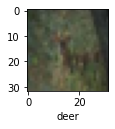

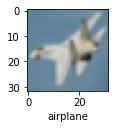

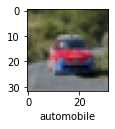

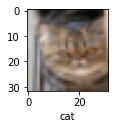

In [26]:
# Plotting some images
plotImage(xTrain, yTrainr, 10)
plotImage(xTest, yTestr, 10)
plotImage(xTrain, yTrainr, 6969)
plotImage(xTest, yTestr, 4987)

#### <i>Resizing Image to Make It Suitable for Applying Convolution Operations</i>

In [27]:
IMG_SIZE = 32
# Increasing by one dimension (making it 4-dimensional) so that it can work with
# Keras API
xTrainr = np.array(xTrain).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
xTestr = np.array(xTest).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

print("-----------------------------------------------------------------------")
print("Training samples shape:", xTrainr.shape)
print("Testing samples shape:", xTestr.shape)
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
Training samples shape: (50000, 32, 32, 3)
Testing samples shape: (10000, 32, 32, 3)
-----------------------------------------------------------------------


### <u>Scaling/Normalisation</u>
#### <i>division by 255 to bring in the range 0 to 1</i>

In [28]:
xTrainr = xTrainr / 255
xTestr = xTestr / 255

print("-----------------------------------------------------------------------")
print("The reshaped and normalised (1st training image) image is:", xTrainr[0],
      sep="\n")
print("-----------------------------------------------------------------------")
print("The reshaped and normalised (1st testing image) image is:", xTestr[0],
      sep="\n")
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
The reshaped and normalised (1st training image) image is:
[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.121

### <u>Creating Deep Neural Netwrok</u>
#### <i>and training on 50000 traning samples</i>

In [29]:
# Importing the required functions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, MaxPool2D
from tensorflow.keras.layers import Flatten, Conv2D, Dropout

In [30]:
# Creating a simple neural network
or_model = Sequential() # Sequential allows to build a model layer by layer

# First Convolutional Layer
# (input layer size is mentioned for only first layer)
or_model.add(Conv2D(50, kernel_size=(3, 3), input_shape=(32, 32, 3),
                    strides=(1, 1), padding='same', activation='relu'))
# maxpooling single maximum value of 2x2
or_model.add(MaxPool2D(pool_size=(2, 2))) # selects the maximum element from
                                          # each region of the feature map
                                          # reducing the size by half

# Second Convolutional Layer
or_model.add(Conv2D(100, kernel_size=(3, 3), strides=(1, 1), padding='same',
                    activation='relu'))
or_model.add(MaxPool2D(pool_size=(2, 2)))
or_model.add(Dropout(0.3)) # to avoid overfitting

# Third Convolutional Layer
or_model.add(Conv2D(150, kernel_size=(3, 3), strides=(1, 1), padding='same',
                    activation='relu'))
or_model.add(MaxPool2D(pool_size=(2, 2)))
or_model.add(Dropout(0.3))

# Now we shall flatten (transfroming into a single column) the feature map
# matrix before connecting the layers fully
or_model.add(Flatten())

# Creating the dense layer (fully connecting the each layer to the next layer)
or_model.add(Dense(400, activation='relu')) # connecting first layer
or_model.add(Dropout(0.4))

or_model.add(Dense(200, activation='relu')) # connecting layer 2
or_model.add(Dropout(0.4))

# Last fully connected layer, where the output must be equal to number of
# classes, 10, that is
or_model.add(Dense(10))
or_model.add(Activation("softmax")) # class probabilities

In [31]:
# Displaying the or_model summary
print("-----------------------------------------------------------------------")
print("Here is the model's summary:-")
display(or_model.summary())
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
Here is the model's summary:-
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 50)        1400      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 50)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 100)       45100     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 100)        0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 8, 8, 100)         0         
                  

None

-----------------------------------------------------------------------


### <u>Compiling the AI model</u>

In [32]:
# Compiling our AI model
or_model.compile(
    optimizer="adam", # controls the learning rate
    loss="sparse_categorical_crossentropy", # estimates the loss of the model
    metrics=['accuracy']
)

### <u>Training the Model</u>

In [33]:
or_model.fit(xTrainr, yTrain, batch_size=128, epochs=30, validation_split=0.3,
             validation_data=(xTestr, yTest))

Epoch 1/30
274/274 [==============================] - 55s 197ms/step - loss: 1.8256 - accuracy: 0.3176 - val_loss: 1.4582 - val_accuracy: 0.4616
Epoch 2/30
274/274 [==============================] - 55s 202ms/step - loss: 1.4125 - accuracy: 0.4847 - val_loss: 1.2225 - val_accuracy: 0.5579
Epoch 3/30
274/274 [==============================] - 60s 219ms/step - loss: 1.2383 - accuracy: 0.5558 - val_loss: 1.0935 - val_accuracy: 0.6159
Epoch 4/30
274/274 [==============================] - 58s 212ms/step - loss: 1.1100 - accuracy: 0.6055 - val_loss: 0.9665 - val_accuracy: 0.6655
Epoch 5/30
274/274 [==============================] - 55s 199ms/step - loss: 1.0169 - accuracy: 0.6414 - val_loss: 0.9172 - val_accuracy: 0.6789
Epoch 6/30
274/274 [==============================] - 56s 205ms/step - loss: 0.9394 - accuracy: 0.6695 - val_loss: 0.8742 - val_accuracy: 0.7021
Epoch 7/30
274/274 [==============================] - 59s 215ms/step - loss: 0.8753 - accuracy: 0.6937 - val_loss: 0.7898 - val_ac

### <u>Evaluation of the Model</u>

In [34]:
or_loss, or_accuracy = or_model.evaluate(xTestr, yTest)
print("-----------------------------------------------------------------------")
print("Accuracy Percentage of this AI Model: ", or_accuracy * 100, "%", sep="")
print("-----------------------------------------------------------------------")

313/313 [==============================] - 5s 15ms/step - loss: 0.6662 - accuracy: 0.7835
-----------------------------------------------------------------------
Accuracy Percentage of this AI Model: 78.35000157356262%
-----------------------------------------------------------------------


### <u>Model Predictions</u>

In [35]:
classesIdx = range(0, 10)
# Zipping the classesIdx and classes to make a dictionary of class_label
classLabels = dict(zip(classesIdx, classes))

# Generating batch of 9 images to predict
batch = xTestr[1000: 1009]
labels = np.argmax(yTest[1000: 1009], axis=(-1))

# Making predictions
yPredictions = or_model.predict(batch)

print("-----------------------------------------------------------------------")
print("The predictions arrays are:-\n", yPredictions)
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
The predictions arrays are:-
 [[1.5440742e-10 2.4659413e-10 3.1082891e-06 1.0001257e-02 8.8676417e-09
  9.8998570e-01 3.2373273e-07 9.6440244e-06 4.6898836e-09 1.0463128e-09]
 [9.9020201e-01 3.1731488e-06 1.8628611e-04 4.0628061e-06 2.2234915e-05
  1.3705680e-07 5.0901758e-07 1.3600150e-07 9.5411874e-03 4.0353603e-05]
 [2.1092400e-02 1.1851062e-01 4.3124836e-03 1.8256545e-01 1.4327290e-02
  6.2580720e-02 1.6955029e-02 2.5151928e-03 3.1916690e-01 2.5797394e-01]
 [5.0482485e-10 4.2656672e-12 4.1587409e-05 8.4241092e-06 8.5968709e-01
  2.0103427e-03 2.6479968e-08 1.3825260e-01 1.8871186e-11 8.6207794e-12]
 [5.2040052e-02 1.8794995e-04 1.0592504e-03 3.8626124e-05 1.7040036e-05
  6.8558342e-07 3.6910242e-05 4.7603422e-07 9.4522858e-01 1.3903377e-03]
 [1.3070214e-05 9.9453676e-01 3.3424169e-06 3.5413489e-06 4.4553951e-07
  4.4817507e-06 1.3979964e-05 7.8594149e-07 4.1332287e-03 1.2903905e-03]
 [2.1447292e-11 9.9961227e-0

In [36]:
# Creating a list of predictions of all the test images
yPredictions = or_model.predict(xTestr)
yPredictedClasses = [np.argmax(probability) for probability in yPredictions]

In [37]:
# Function to check if the prediction was correct
def ifPredictionCorrect(index):
    # Plotting the image first
    plotImage(xTest, yTestr, index)

    print("Actual class of the object:", classes[yTestr[index]])
    print("Predicted class of the object:", classes[yPredictedClasses[index]])

    
    if classes[yPredictedClasses[index]] == classes[yTestr[index]]:
        print("Correct Prediction!")
    else:
        print("Incorrect Prediction!")

    print("")
# end function ifPredictionCorrect()

-----------------------------------------------------------------------
Actual class of the object: ship
Predicted class of the object: airplane
Incorrect Prediction!

Actual class of the object: dog
Predicted class of the object: frog
Incorrect Prediction!

Actual class of the object: airplane
Predicted class of the object: airplane
Correct Prediction!

Actual class of the object: airplane
Predicted class of the object: airplane
Correct Prediction!

Actual class of the object: deer
Predicted class of the object: deer
Correct Prediction!

-----------------------------------------------------------------------


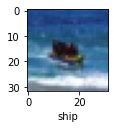

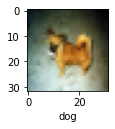

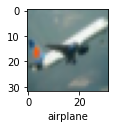

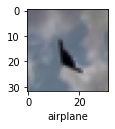

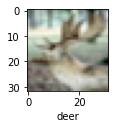

In [38]:
# Function Calls
print("-----------------------------------------------------------------------")
ifPredictionCorrect(368)
ifPredictionCorrect(2989)
ifPredictionCorrect(5788)
ifPredictionCorrect(7356)
ifPredictionCorrect(9536)
print("-----------------------------------------------------------------------")

# <b>---------------------------------------------------------------------------------------------------</b>